In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Functions

In [106]:
def make_luck_skill_continuum():

    # Set the figure size
    plt.figure(figsize=(12,6))

    # Set the range of the x-axis
    plt.xlim(0, 100)

    # Set the range of the y-axis
    plt.ylim(0, 1)
    plt.hlines(0.5, 0, 100, linestyles='dashed', colors='grey')

    plt.text(1, 0.52, "Luck", fontsize=20, color='red')
    plt.text(93, 0.52, "Skill", fontsize=20, color='red')

    # Add texts at the specified locations
    plt.text(25, 0.52, "Soccer?")
    plt.text(50, 0.52, "Esports?")
    plt.text(75, 0.52, "Basketball?")
    plt.text(85, 0.52, "Chess?")
    plt.text(60, 0.52, "Climbing?")

    plt.vlines(25, 0.48, 0.52, linestyles='dashed', colors='blue')
    plt.vlines(50, 0.48, 0.52, linestyles='dashed', colors='blue')
    plt.vlines(75, 0.48, 0.52, linestyles='dashed', colors='blue')
    plt.vlines(85, 0.48, 0.52, linestyles='dashed', colors='blue')
    plt.vlines(60, 0.48, 0.52, linestyles='dashed', colors='blue')

    plt.text(25,0.85, "Luck and Skill Continuum", fontsize=30, color='red')

    # Show the plot
    plt.show()


def make_comparison_plot():
    fig, ax = plt.subplots(1,2,figsize=(12,6))

    ax[0].hist(nba_points[-2],bins=np.arange(0,60,2))
    ax[0].set_title("NBA Season 2015")
    ax[0].set_xlabel("#Wins")
    ax[0].set_ylabel("#Teams")
    ax[0].set_ylim(0,10)
    var = round(df_nba_filtered["Var"].values[-2],2)
    ax[0].text(5,8,f"Variance: {var}",fontsize=15,color='red')

    ax[1].hist(nfl_points[16],bins=np.arange(0,60,2))
    ax[1].set_title("NFL Season 2015")
    ax[1].set_xlabel("#Wins")
    ax[1].set_ylabel("#Teams")
    var = round(df_nfl_filtered["Var"].values[16],2)
    ax[1].text(12,8,f"Variance: {var}",fontsize=15,color='red')
    ax[1].set_ylim(0,10)
    fig.show()

def make_luck_comparison():
    p=0.5

    fig, ax = plt.subplots(1,2,figsize=(12,6))

    # Set the number of trials (n)
    n = 82
    x = np.arange(0, n+1)
    y = np.power(p, x) * np.power(1-p, n-x) * np.array([np.math.comb(n, xs) for xs in x])
    y=y*30
    ax[0].plot(x,y,linewidth=3)
    ax[0].set_title("NBA Season just luck")
    ax[0].set_xlabel("#Wins")
    ax[0].set_ylabel("#Teams")
    ax[0].set_ylim(0,10)
    ax[0].set_xlim(0,60)

    n = 16
    x = np.arange(0, n+1)
    y = np.power(p, x) * np.power(1-p, n-x) * np.array([np.math.comb(n, xs) for xs in x])
    y=y*32
    ax[1].plot(x,y,linewidth=3)
    ax[1].set_title("NFL Season just luck")
    ax[1].set_xlabel("#Wins")
    ax[1].set_ylabel("#Teams")
    ax[1].set_ylim(0,10)
    ax[1].set_xlim(0,60)

    fig.show()

In [27]:
df_nba = pd.read_parquet('prepared_data/NBA.parquet')
df_nfl = pd.read_parquet('prepared_data/NFL.parquet')
df_nfl_filtered = df_nfl[df_nfl["N"]>10]
df_nfl_filtered["#Teams"] = df_nfl_filtered["Teams"].apply(lambda x: len(x))
df_nfl_filtered["Var"] = df_nfl_filtered["Points"].apply(lambda x: np.var(x))
nfl_points = df_nfl_filtered["Points"].values

df_nba_filtered = df_nba[df_nba["N"]>80]
df_nba_filtered["#Teams"] = df_nba_filtered["Teams"].apply(lambda x: len(x))
df_nba_filtered["Var"] = df_nba_filtered["Points"].apply(lambda x: np.var(x))
nba_points = df_nba_filtered["Points"].values

In [108]:
df_nba

,Year,Teams,Wins,Losses,Ties,Points,N
0,1946,"[Boston Celtics, New York Knicks, Philadelphia...","[22, 33, 35]","[38, 27, 25]","[0.0, 0.0, 0.0]","[22, 33, 35]",60.0
1,1947,"[Boston Celtics, New York Knicks, Philadelphia...","[20, 26, 27]","[28, 22, 21]","[0.0, 0.0, 0.0]","[20, 26, 27]",48.0
2,1948,"[Boston Celtics, New York Knicks, Fort Wayne P...","[25, 32, 22, 28, 45, 44]","[35, 28, 38, 32, 15, 16]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[25, 32, 22, 28, 45, 44]",60.0
3,1949,"[Boston Celtics, New York Knicks, Syracuse Nat...","[22, 40, 51, 40, 26, 51, 51, 29]","[46, 28, 13, 28, 42, 17, 17, 35]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[22, 40, 51, 40, 26, 51, 51, 29]",68.0
4,1950,"[Boston Celtics, New York Knicks, Syracuse Nat...","[39, 36, 32, 32, 40, 41, 44, 25]","[30, 30, 34, 36, 26, 27, 24, 43]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[39, 36, 32, 32, 40, 41, 44, 25]",69.0
...,...,...,...,...,...,...,...
67,2013,"[Boston Celtics, Toronto Raptors, New York Kni...","[25, 48, 37, 19, 44, 40, 59, 36, 54, 25, 33, 2...","[57, 34, 45, 63, 38, 42, 23, 46, 28, 57, 49, 5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[25, 48, 37, 19, 44, 40, 59, 36, 54, 25, 33, 2...",82.0
68,2014,"[Boston Celtics, Toronto Raptors, New York Kni...","[40, 49, 17, 18, 38, 16, 45, 30, 51, 38, 53, 3...","[42, 33, 65, 64, 44, 66, 37, 52, 31, 44, 29, 5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[40, 49, 17, 18, 38, 16, 45, 30, 51, 38, 53, 3...",82.0
69,2015,"[Boston Celtics, Toronto Raptors, New York Kni...","[48, 56, 32, 10, 21, 29, 55, 33, 44, 40, 57, 4...","[34, 26, 50, 72, 61, 53, 27, 49, 38, 42, 25, 3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[48, 56, 32, 10, 21, 29, 55, 33, 44, 40, 57, 4...",82.0
70,2016,"[Boston Celtics, Toronto Raptors, New York Kni...","[53, 51, 31, 28, 20, 31, 47, 40, 41, 51, 51, 3...","[29, 31, 51, 54, 62, 51, 35, 42, 41, 31, 31, 4...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[53, 51, 31, 28, 20, 31, 47, 40, 41, 51, 51, 3...",82.0


# Main Idea

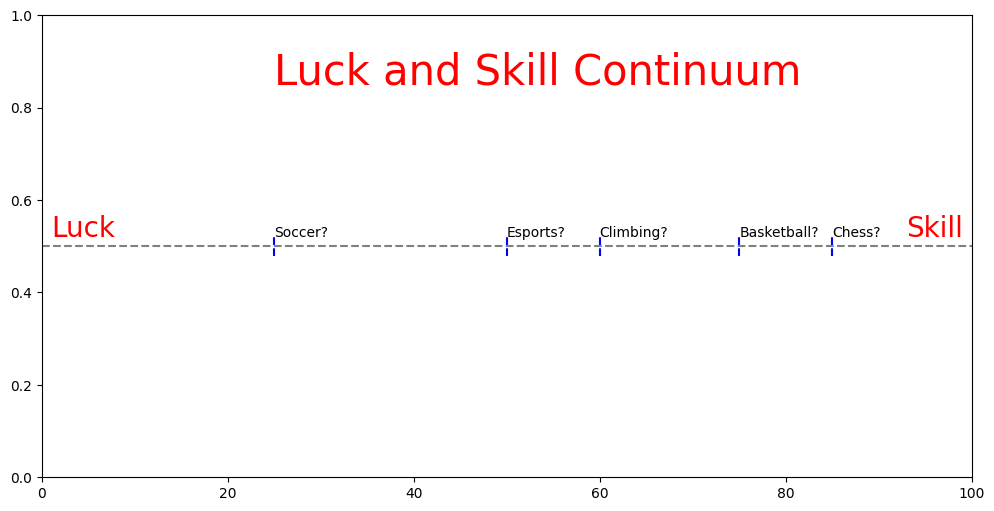

In [76]:
make_luck_skill_continuum()

**Var(Observed) = Var(Skill) + Var(Luck)**

### Example Observed

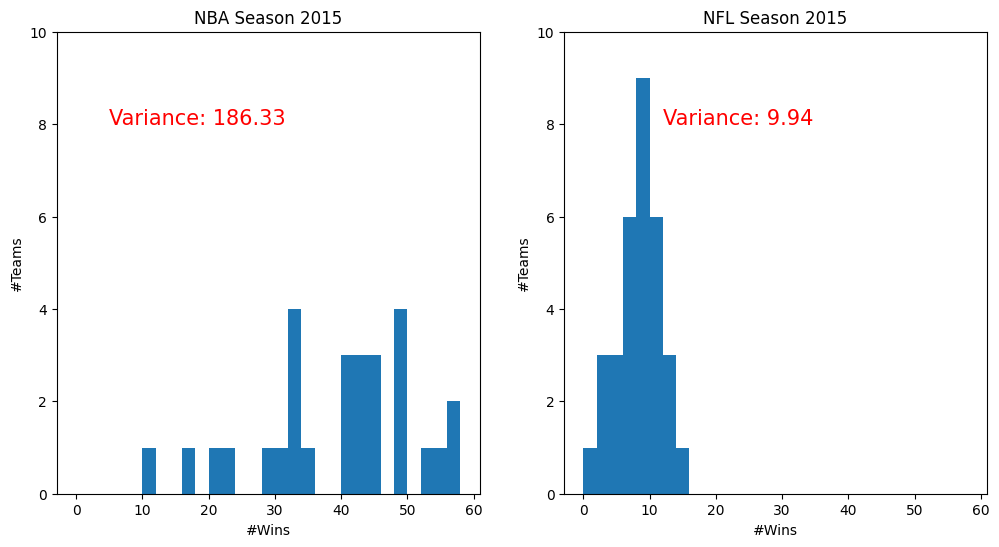

In [61]:
make_comparison_plot()

### Example just Luck (simplified)

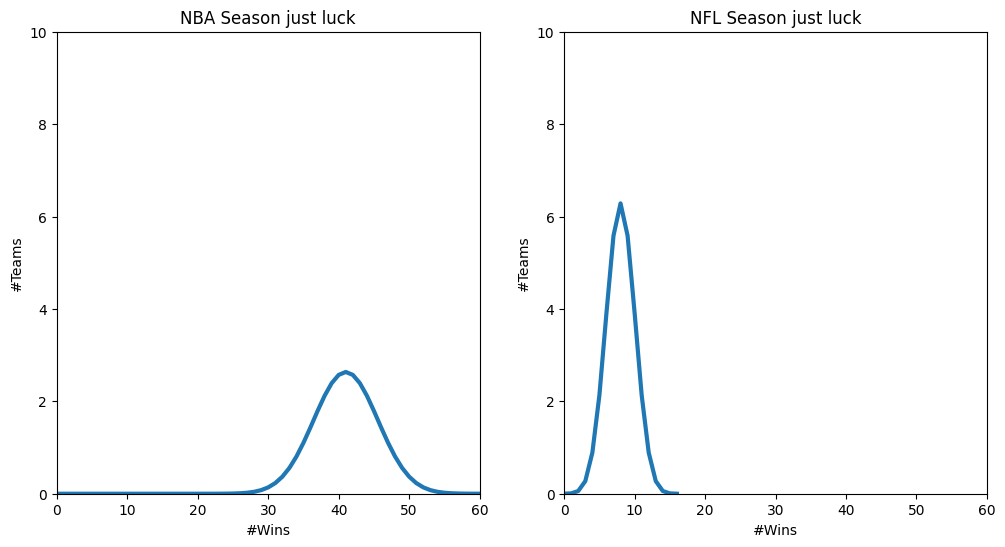

In [107]:
make_luck_comparison()

## Explaination for results

### Reasons for different luck and skill components:

**Number of Games/Events?**

**Number of Players worldwide?**

**Number of Opportunities (Length, Attempts)**




# Questions

### Ideas to compare distributions

- Variance, Entropy, KLD

### Deal with sampling distribution

- Simulations

### Quantify Uncertainty

- Different #Games, #Teams, #Seasons
- Points are different
- No league system in sports

In [2]:
df = pd.read_parquet("prepared_data/NHL_data.parquet")

In [5]:
[len(x) for x in df["Teams"].values]

[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31]

In [10]:
ls_wins = np.array([0,2,8,4,6,4,1,7])
ls_points_1 = ls_wins*1
ls_points_2 = ls_wins*2
ls_points_3 = ls_wins*3

In [12]:
#import min max scaler
from sklearn.preprocessing import MinMaxScaler

In [13]:
ls_points_1_ms = MinMaxScaler().fit_transform(ls_points_1.reshape(-1,1))
ls_points_2_ms = MinMaxScaler().fit_transform(ls_points_2.reshape(-1,1))
ls_points_3_ms = MinMaxScaler().fit_transform(ls_points_3.reshape(-1,1))
ls_wins_ms = MinMaxScaler().fit_transform(ls_wins.reshape(-1,1))

In [16]:
print(np.var(ls_points_1_ms))
print(np.var(ls_points_2_ms))
print(np.var(ls_points_3_ms))
print(np.var(ls_wins_ms))

0.11328125
0.11328125
0.11328125
0.11328125
